In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve
import matplotlib.patches as patches


##################머신러닝 모듈 ################

from sklearn.model_selection import train_test_split #사이킷런 import
from sklearn.linear_model import LinearRegression

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)


In [2]:
file_url = "https://media.githubusercontent.com/media/musthave-ML10/data_source/main/dating.csv"
pd.options.display.max_columns = 40
data = pd.read_csv(file_url , skipinitialspace= True) #빈칸 모두 제거

data.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,9.0,7.0,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8.0,7.0,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,8.0,9.0,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,6.0,8.0,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,6.0,7.0,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8315 non-null   object 
 5   race_o                         8305 non-null   object 
 6   importance_same_race           8299 non-null   float64
 7   importance_same_religion       8299 non-null   float64
 8   pref_o_attractive              8289 non-null   float64
 9   pref_o_sincere                 8289 non-null   float64
 10  pref_o_intelligence            8289 non-null   float64
 11  pref_o_funny                   8280 non-null   float64
 12  pref_o_ambitious               8271 non-null   f

In [4]:
round(data.describe() , 2)

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8283.00,8274.00,8299.00,8299.00,8289.00,8289.00,8289.00,8280.00,8271.00,8249.00,8166.00,8091.00,8072.00,8018.00,7656.00,7302.00,8299.00,8299.00,8299.00,8289.00,8279.00,8257.00,8176.00,8101.00,8082.00,8028.00,7666.00,7311.00,8220.00,8277.00,1800.00,8138.00,8069.00,8003.00,8378.00
mean,0.87,26.36,26.36,3.78,3.65,22.50,17.40,20.27,17.46,10.69,11.85,6.19,7.18,7.37,6.40,6.78,5.47,22.51,17.40,20.27,17.46,10.68,11.85,6.19,7.18,7.37,6.40,6.78,5.47,0.20,5.53,5.57,6.13,5.21,0.05,0.16
std,0.33,3.57,3.56,2.85,2.81,12.57,7.04,6.78,6.09,6.13,6.36,1.95,1.74,1.55,1.95,1.79,2.16,12.59,7.05,6.78,6.09,6.12,6.36,1.95,1.74,1.55,1.95,1.79,2.16,0.30,1.73,4.76,1.84,2.13,0.28,0.37
min,0.00,18.00,18.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,24.00,24.00,1.00,1.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,-0.02,5.00,2.00,5.00,4.00,0.00,0.00
50%,1.00,26.00,26.00,3.00,3.00,20.00,18.37,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,20.00,18.18,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,0.21,6.00,4.00,6.00,5.00,0.00,0.00
75%,1.00,28.00,28.00,6.00,6.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,0.43,7.00,8.00,7.00,7.00,0.00,0.00
max,1.00,55.00,55.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.50,10.00,10.00,11.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.00,10.00,10.00,10.00,10.00,10.00,0.91,10.00,20.00,10.00,10.00,8.00,1.00


In [5]:
data.isna().mean() # 결측치 비율 구하기

has_null                         0.000000
gender                           0.000000
age                              0.011339
age_o                            0.012413
race                             0.007520
race_o                           0.008713
importance_same_race             0.009429
importance_same_religion         0.009429
pref_o_attractive                0.010623
pref_o_sincere                   0.010623
pref_o_intelligence              0.010623
pref_o_funny                     0.011697
pref_o_ambitious                 0.012772
pref_o_shared_interests          0.015397
attractive_o                     0.025304
sincere_o                        0.034256
intelligence_o                   0.036524
funny_o                          0.042970
ambitous_o                       0.086178
shared_interests_o               0.128432
attractive_important             0.009429
sincere_important                0.009429
intellicence_important           0.009429
funny_important                  0

In [6]:
data = data.dropna(subset =['pref_o_attractive' , 'pref_o_sincere' , 'pref_o_intelligence' , 'pref_o_funny' , 'pref_o_ambitious' , 'pref_o_shared_interests',
                            'attractive_important' , 'sincere_important' , 'intellicence_important' , 'funny_important' , 'ambtition_important' , 'shared_interests_important']) # 일부 변수에서 결측치 제거

data = data.fillna(-99) # 나머지 변수의 결측치는 -99로 대체

In [7]:
data

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,9.0,7.0,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8.0,7.0,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,8.0,9.0,8.0,5.0,7.0,0.16,3.0,2.0,7.0,-99.0,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,6.0,8.0,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,6.0,7.0,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,1,male,25.0,24.0,European/Caucasian-American,European/Caucasian-American,1.0,1.0,10.0,15.0,30.0,20.0,15.0,10.0,8.0,8.0,7.0,7.0,8.0,6.0,70.0,0.0,15.0,15.0,0.0,0.0,7.0,5.0,5.0,5.0,6.0,-99.0,0.28,10.0,-99.0,4.0,4.0,0.0,0
8373,1,male,25.0,26.0,European/Caucasian-American,Latino/HispanicAmerican,1.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,10.0,5.0,3.0,2.0,6.0,5.0,70.0,0.0,15.0,15.0,0.0,0.0,3.0,5.0,5.0,5.0,-99.0,-99.0,0.64,10.0,-99.0,2.0,5.0,0.0,0
8374,1,male,25.0,24.0,European/Caucasian-American,Other,1.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,6.0,3.0,7.0,3.0,7.0,2.0,70.0,0.0,15.0,15.0,0.0,0.0,4.0,6.0,8.0,4.0,4.0,-99.0,0.71,10.0,-99.0,4.0,4.0,0.0,0
8376,1,male,25.0,22.0,European/Caucasian-American,Asian/PacificIslander/Asian-American,1.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,5.0,7.0,5.0,5.0,3.0,6.0,70.0,0.0,15.0,15.0,0.0,0.0,4.0,6.0,5.0,4.0,-99.0,5.0,0.62,10.0,-99.0,5.0,5.0,0.0,0


In [8]:
def age_gap(x):
    if x['age'] == -99: # 본인 나이
        return -99

    elif x['age_o'] == -99: # 상대방 나이
        return -99

    elif x['gender'] == 'female': # gender가 female이라면
        return x['age_o'] - x['age'] # age_o 에서 age를 뺀값 리턴

    else:
        return x['age'] - x['age_o'] # age에서 age_o를 뺀 값 리턴

# 남녀 중 한명이라도 나이가 -99이면 -99를 반환한다.

In [9]:
data['age_gap'] = data.apply(age_gap , axis = 1)

data['age_gap_abs'] = abs(data['age_gap']) # 절댓값 적용

data

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,...,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match,age_gap,age_gap_abs
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,...,20.0,20.0,15.0,15.0,15.0,6.0,9.0,7.0,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0,6.0,6.0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,...,20.0,20.0,15.0,15.0,15.0,7.0,8.0,7.0,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0,1.0,1.0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,...,20.0,20.0,15.0,15.0,15.0,5.0,8.0,9.0,8.0,5.0,7.0,0.16,3.0,2.0,7.0,-99.0,1.0,1,1.0,1.0
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,...,20.0,20.0,15.0,15.0,15.0,7.0,6.0,8.0,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1,2.0,2.0
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,...,20.0,20.0,15.0,15.0,15.0,5.0,6.0,7.0,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,1,male,25.0,24.0,European/Caucasian-American,European/Caucasian-American,1.0,1.0,10.0,15.0,30.0,20.0,15.0,10.0,8.0,8.0,7.0,7.0,8.0,6.0,...,0.0,15.0,15.0,0.0,0.0,7.0,5.0,5.0,5.0,6.0,-99.0,0.28,10.0,-99.0,4.0,4.0,0.0,0,1.0,1.0
8373,1,male,25.0,26.0,European/Caucasian-American,Latino/HispanicAmerican,1.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,10.0,5.0,3.0,2.0,6.0,5.0,...,0.0,15.0,15.0,0.0,0.0,3.0,5.0,5.0,5.0,-99.0,-99.0,0.64,10.0,-99.0,2.0,5.0,0.0,0,-1.0,1.0
8374,1,male,25.0,24.0,European/Caucasian-American,Other,1.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,6.0,3.0,7.0,3.0,7.0,2.0,...,0.0,15.0,15.0,0.0,0.0,4.0,6.0,8.0,4.0,4.0,-99.0,0.71,10.0,-99.0,4.0,4.0,0.0,0,1.0,1.0
8376,1,male,25.0,22.0,European/Caucasian-American,Asian/PacificIslander/Asian-American,1.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,5.0,7.0,5.0,5.0,3.0,6.0,...,0.0,15.0,15.0,0.0,0.0,4.0,6.0,5.0,4.0,-99.0,5.0,0.62,10.0,-99.0,5.0,5.0,0.0,0,3.0,3.0


In [10]:
def same_race(x) : # 함수 정의 ==> 인종 데이터 관련 피처 엔지니어링
    if x['race'] == -99: # race가 -99 면(결측치 이면)
        return -99
    elif x['race_o'] == -99 :
        return -99
    elif x['race'] == x['race_o']: # 인종이 같으면
        return 1

    else: # 인종이 다르면
        return -1

In [11]:
data['same_race'] = data.apply(same_race , axis = 1)

data

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,...,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match,age_gap,age_gap_abs,same_race
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,...,20.0,15.0,15.0,15.0,6.0,9.0,7.0,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0,6.0,6.0,-1
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,...,20.0,15.0,15.0,15.0,7.0,8.0,7.0,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0,1.0,1.0,-1
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,...,20.0,15.0,15.0,15.0,5.0,8.0,9.0,8.0,5.0,7.0,0.16,3.0,2.0,7.0,-99.0,1.0,1,1.0,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,...,20.0,15.0,15.0,15.0,7.0,6.0,8.0,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1,2.0,2.0,-1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,...,20.0,15.0,15.0,15.0,5.0,6.0,7.0,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1,3.0,3.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,1,male,25.0,24.0,European/Caucasian-American,European/Caucasian-American,1.0,1.0,10.0,15.0,30.0,20.0,15.0,10.0,8.0,8.0,7.0,7.0,8.0,6.0,...,15.0,15.0,0.0,0.0,7.0,5.0,5.0,5.0,6.0,-99.0,0.28,10.0,-99.0,4.0,4.0,0.0,0,1.0,1.0,1
8373,1,male,25.0,26.0,European/Caucasian-American,Latino/HispanicAmerican,1.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,10.0,5.0,3.0,2.0,6.0,5.0,...,15.0,15.0,0.0,0.0,3.0,5.0,5.0,5.0,-99.0,-99.0,0.64,10.0,-99.0,2.0,5.0,0.0,0,-1.0,1.0,-1
8374,1,male,25.0,24.0,European/Caucasian-American,Other,1.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,6.0,3.0,7.0,3.0,7.0,2.0,...,15.0,15.0,0.0,0.0,4.0,6.0,8.0,4.0,4.0,-99.0,0.71,10.0,-99.0,4.0,4.0,0.0,0,1.0,1.0,-1
8376,1,male,25.0,22.0,European/Caucasian-American,Asian/PacificIslander/Asian-American,1.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,5.0,7.0,5.0,5.0,3.0,6.0,...,15.0,15.0,0.0,0.0,4.0,6.0,5.0,4.0,-99.0,5.0,0.62,10.0,-99.0,5.0,5.0,0.0,0,3.0,3.0,-1


In [12]:
def same_race_point(x):
    if x['same_race'] == -99:
        return -99

    else:
        return x['same_race'] * x['importance_same_race']

In [13]:
data['same_race_point'] = data.apply(same_race_point , axis =1)

# data에 same_race_point 함수를 적용한 결과를 same_race_point 변소로 저장

In [14]:
data

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,...,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match,age_gap,age_gap_abs,same_race,same_race_point
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,...,15.0,15.0,15.0,6.0,9.0,7.0,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0,6.0,6.0,-1,-2.0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,...,15.0,15.0,15.0,7.0,8.0,7.0,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0,1.0,1.0,-1,-2.0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,...,15.0,15.0,15.0,5.0,8.0,9.0,8.0,5.0,7.0,0.16,3.0,2.0,7.0,-99.0,1.0,1,1.0,1.0,1,2.0
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,...,15.0,15.0,15.0,7.0,6.0,8.0,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1,2.0,2.0,-1,-2.0
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,...,15.0,15.0,15.0,5.0,6.0,7.0,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1,3.0,3.0,-1,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,1,male,25.0,24.0,European/Caucasian-American,European/Caucasian-American,1.0,1.0,10.0,15.0,30.0,20.0,15.0,10.0,8.0,8.0,7.0,7.0,8.0,6.0,...,15.0,0.0,0.0,7.0,5.0,5.0,5.0,6.0,-99.0,0.28,10.0,-99.0,4.0,4.0,0.0,0,1.0,1.0,1,1.0
8373,1,male,25.0,26.0,European/Caucasian-American,Latino/HispanicAmerican,1.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,10.0,5.0,3.0,2.0,6.0,5.0,...,15.0,0.0,0.0,3.0,5.0,5.0,5.0,-99.0,-99.0,0.64,10.0,-99.0,2.0,5.0,0.0,0,-1.0,1.0,-1,-1.0
8374,1,male,25.0,24.0,European/Caucasian-American,Other,1.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,6.0,3.0,7.0,3.0,7.0,2.0,...,15.0,0.0,0.0,4.0,6.0,8.0,4.0,4.0,-99.0,0.71,10.0,-99.0,4.0,4.0,0.0,0,1.0,1.0,-1,-1.0
8376,1,male,25.0,22.0,European/Caucasian-American,Asian/PacificIslander/Asian-American,1.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,5.0,7.0,5.0,5.0,3.0,6.0,...,15.0,0.0,0.0,4.0,6.0,5.0,4.0,-99.0,5.0,0.62,10.0,-99.0,5.0,5.0,0.0,0,3.0,3.0,-1,-1.0


In [15]:
def rating(data, importance , score) : # 함수 정의
    if data[importance] == -99 :
        return -99
    elif data[score] == -99 :
        return -99
    else:
        return data[importance] * data[score];

In [16]:
data.columns[8:14]

Index(['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'],
      dtype='object')

In [17]:
partner_imp = data.columns[8:14] # 상대방 중요도
partner_rate_me = data.columns[14:20] # 본인에 대한 상대방의 평가
my_imp = data.columns[20:26] # 본인의 중요도
my_rate_partner = data.columns[26:32]  # 상대방에 대한 본인의 평가

In [18]:
partner_imp

Index(['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'],
      dtype='object')

In [19]:
new_label_partner = ['attractive_p' , 'sincere_partner_p' , 'intelligence_p' , 'funny_p' , 'ambition_p' , 'shared_interests_p']

# 상대방 관련 새 변수

new_label_me = ['attractive_m' , 'sincere_partner_m' , 'intelligence_m' , 'funny_m' , 'ambition_m' , 'shared_interests_m']

# 본인 관련 새 변수

In [20]:
for i,j,k in zip(new_label_partner , partner_imp , partner_rate_me) :
    data[i] = data.apply(lambda x : rating(x,j,k) , axis =1 )  # x= 데이터프레임, j = 중요도 변수 이름  , k = 평가 변수

In [21]:
for i,j,k in zip(new_label_me, my_imp , my_rate_partner):
    data[i] = data.apply(lambda x : rating(x,j,k) , axis =1 )

In [22]:
data = pd.get_dummies(data , columns = ['gender' , 'race' , 'race_o'] , drop_first= True) # 더미 변수로 변환

data

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,...,sincere_partner_p,intelligence_p,funny_p,ambition_p,shared_interests_p,attractive_m,sincere_partner_m,intelligence_m,funny_m,ambition_m,shared_interests_m,gender_male,race_Black/AfricanAmerican,race_European/Caucasian-American,race_Latino/HispanicAmerican,race_Other,race_o_Black/AfricanAmerican,race_o_European/Caucasian-American,race_o_Latino/HispanicAmerican,race_o_Other
0,0,21.0,27.0,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,...,160.0,160.0,160.0,0.0,30.0,90.0,180.0,140.0,105.0,90.0,75.0,0,0,0,0,0,0,1,0,0
1,0,21.0,22.0,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,...,0.0,0.0,280.0,0.0,0.0,105.0,160.0,140.0,120.0,75.0,90.0,0,0,0,0,0,0,1,0,0
2,1,21.0,22.0,2.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,...,180.0,190.0,180.0,140.0,120.0,75.0,160.0,180.0,120.0,75.0,105.0,0,0,0,0,0,0,0,0,0
3,0,21.0,23.0,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,...,40.0,135.0,320.0,45.0,40.0,105.0,120.0,160.0,105.0,90.0,120.0,0,0,0,0,0,0,1,0,0
4,0,21.0,24.0,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,...,70.0,180.0,60.0,90.0,140.0,75.0,120.0,140.0,105.0,90.0,90.0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8372,1,25.0,24.0,1.0,1.0,10.0,15.0,30.0,20.0,15.0,10.0,8.0,8.0,7.0,7.0,8.0,6.0,70.0,0.0,15.0,...,120.0,210.0,140.0,120.0,60.0,490.0,0.0,75.0,75.0,0.0,-99.0,1,0,1,0,0,0,1,0,0
8373,1,25.0,26.0,1.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,10.0,5.0,3.0,2.0,6.0,5.0,70.0,0.0,15.0,...,50.0,90.0,40.0,60.0,75.0,210.0,0.0,75.0,75.0,-99.0,-99.0,1,0,1,0,0,0,0,1,0
8374,1,25.0,24.0,1.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,6.0,3.0,7.0,3.0,7.0,2.0,70.0,0.0,15.0,...,60.0,70.0,15.0,70.0,10.0,280.0,0.0,120.0,60.0,0.0,-99.0,1,0,1,0,0,0,0,0,1
8376,1,25.0,22.0,1.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,5.0,7.0,5.0,5.0,3.0,6.0,70.0,0.0,15.0,...,175.0,125.0,50.0,30.0,120.0,280.0,0.0,75.0,60.0,-99.0,0.0,1,0,1,0,0,0,0,0,0


In [23]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(data.drop('match', axis =1) , data['match'] , test_size= 0.2 , random_state= 100) # 훈련셋/ 시험셋 분리

In [24]:
!pip install --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --trusted-host pypi.org xgboost

     ---------------------------------------- 89.1/89.1 MB 8.7 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators = 500 , max_depth = 5 , random_state = 100) # 모델 객체 생성

model.fit(X_train , y_train) # 훈련

pred = model.predict(X_test) # 예측

from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

accuracy_score(y_test , pred) # 정확도

0.8616236162361623

In [26]:
print(confusion_matrix(y_test , pred))

[[1291   74]
 [ 151  110]]


In [27]:
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.60      0.42      0.49       261

    accuracy                           0.86      1626
   macro avg       0.75      0.68      0.71      1626
weighted avg       0.85      0.86      0.85      1626



In [28]:
max_depth = [3,5,10]
learning_rate = [0.01, 0.05 , 0.1]

#==> 그리드 서치 적용시 9가지 조합 생성

# 9가지 조합을 각각 모델링 ==> 그리드 서치에서는 교차검증도 함께 사용 ==> 교차검증의 횟수만큼 곱해진 횟수가 모델링

In [29]:
from sklearn.model_selection import GridSearchCV #import

parameters = {
    'learning_rate' : [0.01 , 0.1 , 0.3] ,
    'max_depth' : [5 , 7 , 10] ,
    'subsample' : [0.5 , 0.7 , 1] ,
    'n_estimators' : [300, 500 , 1000]
} # 하이퍼파라미터 셋 정의

In [30]:
model = xgb.XGBClassifier() # 모델 객체 생성

In [31]:
gs_model = GridSearchCV(model , parameters ,n_jobs=-1 , scoring='f1' , cv = 5) # n_jobs 는 사용할 코어 수 , scoring은 모델링할때 어떤 기준으로 최적의 모델을 평가할지, cv는 K-FOLD 값

In [32]:
gs_model.fit(X_train , y_train) # 학습

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [34]:
gs_model.best_params_ # 최적의 하이퍼파라미터 출력

{'learning_rate': 0.300,
 'max_depth': 5,
 'n_estimators': 1000,
 'subsample': 0.500}

In [35]:
pred = gs_model.predict(X_test)

In [36]:
accuracy_score(y_test , pred)

0.8610086100861009

In [38]:
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1365
           1       0.59      0.44      0.50       261

    accuracy                           0.86      1626
   macro avg       0.74      0.69      0.71      1626
weighted avg       0.85      0.86      0.85      1626



In [39]:
model = xgb.XGBClassifier(learning_rate = 0.3 , max_depth = 5 , n_estimators = 1000 , subsample = 0.5 , random_state = 100)

model.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=100, ...)

In [41]:
model.feature_importances_ # 변수 중요도 확인

feature_imp = pd.DataFrame({'features' : X_train.columns , 'values' : model.feature_importances_}) #데이터프레임으로 전환

feature_imp

,features,values
0,has_null,0.021781
1,age,0.011376
2,age_o,0.009981
3,importance_same_race,0.009848
4,importance_same_religion,0.010608
5,pref_o_attractive,0.013594
6,pref_o_sincere,0.010658
7,pref_o_intelligence,0.017140
8,pref_o_funny,0.011863
9,pref_o_ambitious,0.012067


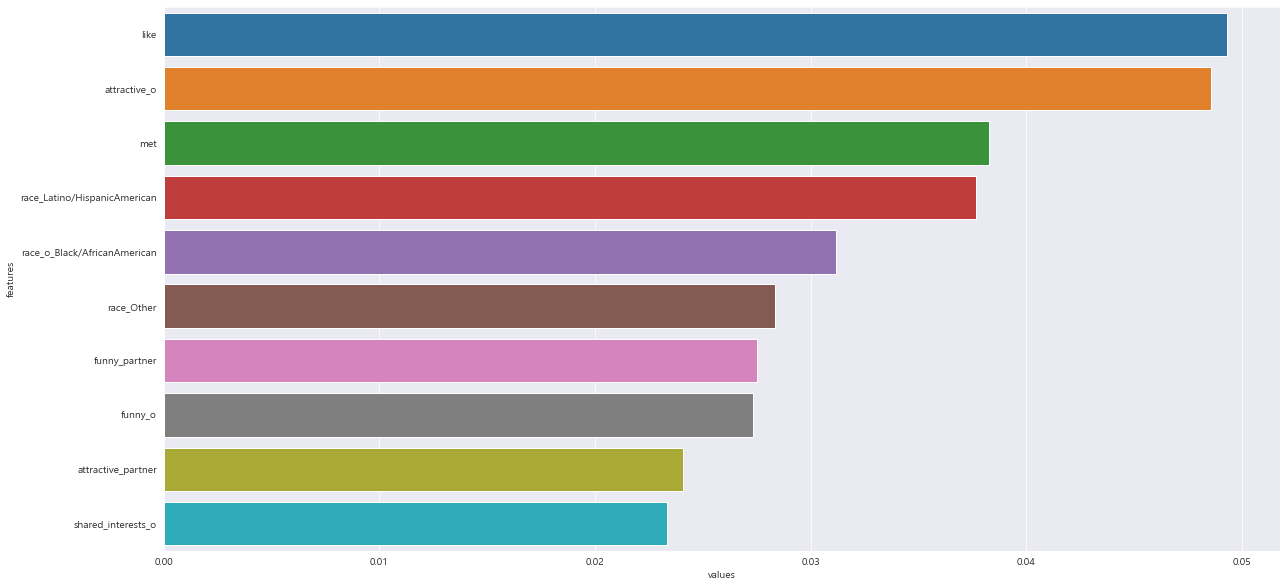

In [42]:
plt.figure(figsize = (20 , 10))
sns.barplot(x='values' , y='features' , data = feature_imp.sort_values(by = 'values' , ascending=False).head(10))